In [1]:
import numpy as np      
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
train  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/training_set_label.csv")
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/testing_set_label.csv')

In [3]:
train.shape,test.shape

((923, 48), (231, 47))

In [4]:
train.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,NaN,04-01-09,01-01-10,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,10-01-12,08-01-10,04-01-12,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
test.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,127,CT,41.321520,-72.929423,6511,c:14666,New Haven,NaN,REMOTV,02-10-07,09-03-11,05-01-07,10/15/2008,0.2192,1.6795,NaN,NaN,5,3,2700000,0,CT,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:14666,0,1,1,1,0,0,1.3333,1
1,556,CA,37.452084,-122.112879,94303,c:31546,Palo Alto,NaN,Satiety,01-01-00,09-10-11,7/19/2007,9/30/2009,7.5507,9.7534,11.0192,11.0192,1,3,62800000,1,CA,1,0,0,0,0,medical,0,0,0,0,0,0,0,0,0,1,c:31546,0,0,0,0,0,1,6.0000,1
2,812,NJ,40.296222,-74.050972,7724,c:46259,Eatontown,Eatontown NJ 7724,CebaTech,01-01-04,06-05-12,4/26/2005,7/21/2006,1.3178,2.5534,4.0027,4.0027,4,2,8500000,1,NJ,0,0,0,0,1,software,1,0,0,0,0,0,0,0,0,0,c:46259,0,0,0,1,1,0,2.0000,0
3,106,CA,37.789268,-122.395184,94105,c:139,San Francisco,NaN,Swivel,12-01-05,07-01-10,09-01-06,04-01-07,0.7507,1.3315,1.0849,6.4986,8,2,2000000,4,CA,1,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,c:139,0,0,1,0,0,0,1.0000,0
4,434,CA,33.133240,-117.275027,92011,c:25449,Carlsbad,NaN,PhotoThera,05-01-97,10/24/2012,4/21/2006,5/22/2009,8.9781,12.0658,NaN,NaN,4,2,80500000,0,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:25449,0,0,0,0,1,1,5.5000,1


In [6]:
# Data preprocessing

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
Unnamed: 0                  923 non-null int64
state_code                  923 non-null object
latitude                    923 non-null float64
longitude                   923 non-null float64
zip_code                    923 non-null object
id                          923 non-null object
city                        923 non-null object
Unnamed: 6                  430 non-null object
name                        923 non-null object
founded_at                  923 non-null object
closed_at                   335 non-null object
first_funding_at            923 non-null object
last_funding_at             923 non-null object
age_first_funding_year      923 non-null float64
age_last_funding_year       923 non-null float64
age_first_milestone_year    771 non-null float64
age_last_milestone_year     771 non-null float64
relationships               923 non-null int64
funding_rounds             

In [7]:
train.describe()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [8]:
train.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,0.063900,-0.054482,0.033649,-0.095814,0.045427,0.010818,-0.003098,0.152413,-0.090600,-0.034656,-0.006352,-0.002213,-0.094189,-0.085940,0.067957,0.063367,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,0.093529,0.333244,0.060217,-0.092801,0.028026,0.013938,-0.029718,0.080510,-0.020575,0.019088,0.000950,0.010355,-0.056627,-0.109853,0.001892,0.047602,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.063900,0.093529,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978


In [9]:
cat_feature = train.select_dtypes(include='object')
cat_feature.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,NaN,04-01-09,01-01-10,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,10-01-12,08-01-10,04-01-12,CA,games_video,c:65806,closed


In [10]:
train = train.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id'],axis=1)
test = test.drop(['state_code','id','Unnamed: 6','state_code.1','category_code','object_id'],axis=1)
train = train.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
test = test.drop(['zip_code','founded_at','closed_at','first_funding_at','last_funding_at','city','name'],axis=1)
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)
train = train.drop(['latitude','longitude'],axis=1)
test = test.drop(['latitude','longitude'],axis=1)

In [11]:
cat_feature = train.select_dtypes(include='object')
cat_feature.head()

,status
0,acquired
1,acquired
2,acquired
3,acquired
4,closed


In [12]:
#AS target variable is object we convert to int so replace the value
train['status'].replace('closed',0,inplace=True)
train['status'].replace('acquired',1,inplace=True)

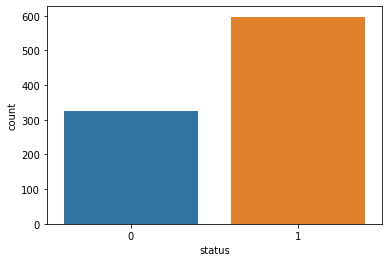

In [13]:
sns.countplot(train['status'])

In [14]:
cat_feature = train.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


# All variable converted to numerical

In [15]:
# Treating null value
train.isnull().sum()

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status  

In [16]:
train['age_first_milestone_year'] = train['age_first_milestone_year'].fillna(train['age_first_milestone_year'].median())
test['age_first_milestone_year'] = test['age_first_milestone_year'].fillna(train['age_first_milestone_year'].median())
train['age_last_milestone_year'] = train['age_last_milestone_year'].fillna(train['age_last_milestone_year'].median())
test['age_last_milestone_year'] = test['age_last_milestone_year'].fillna(train['age_last_milestone_year'].median())

In [17]:
print("After Fill Null Value Total Null Value is",train.isnull().sum().sum())

After Fill Null Value Total Null Value is 0


In [18]:
train.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


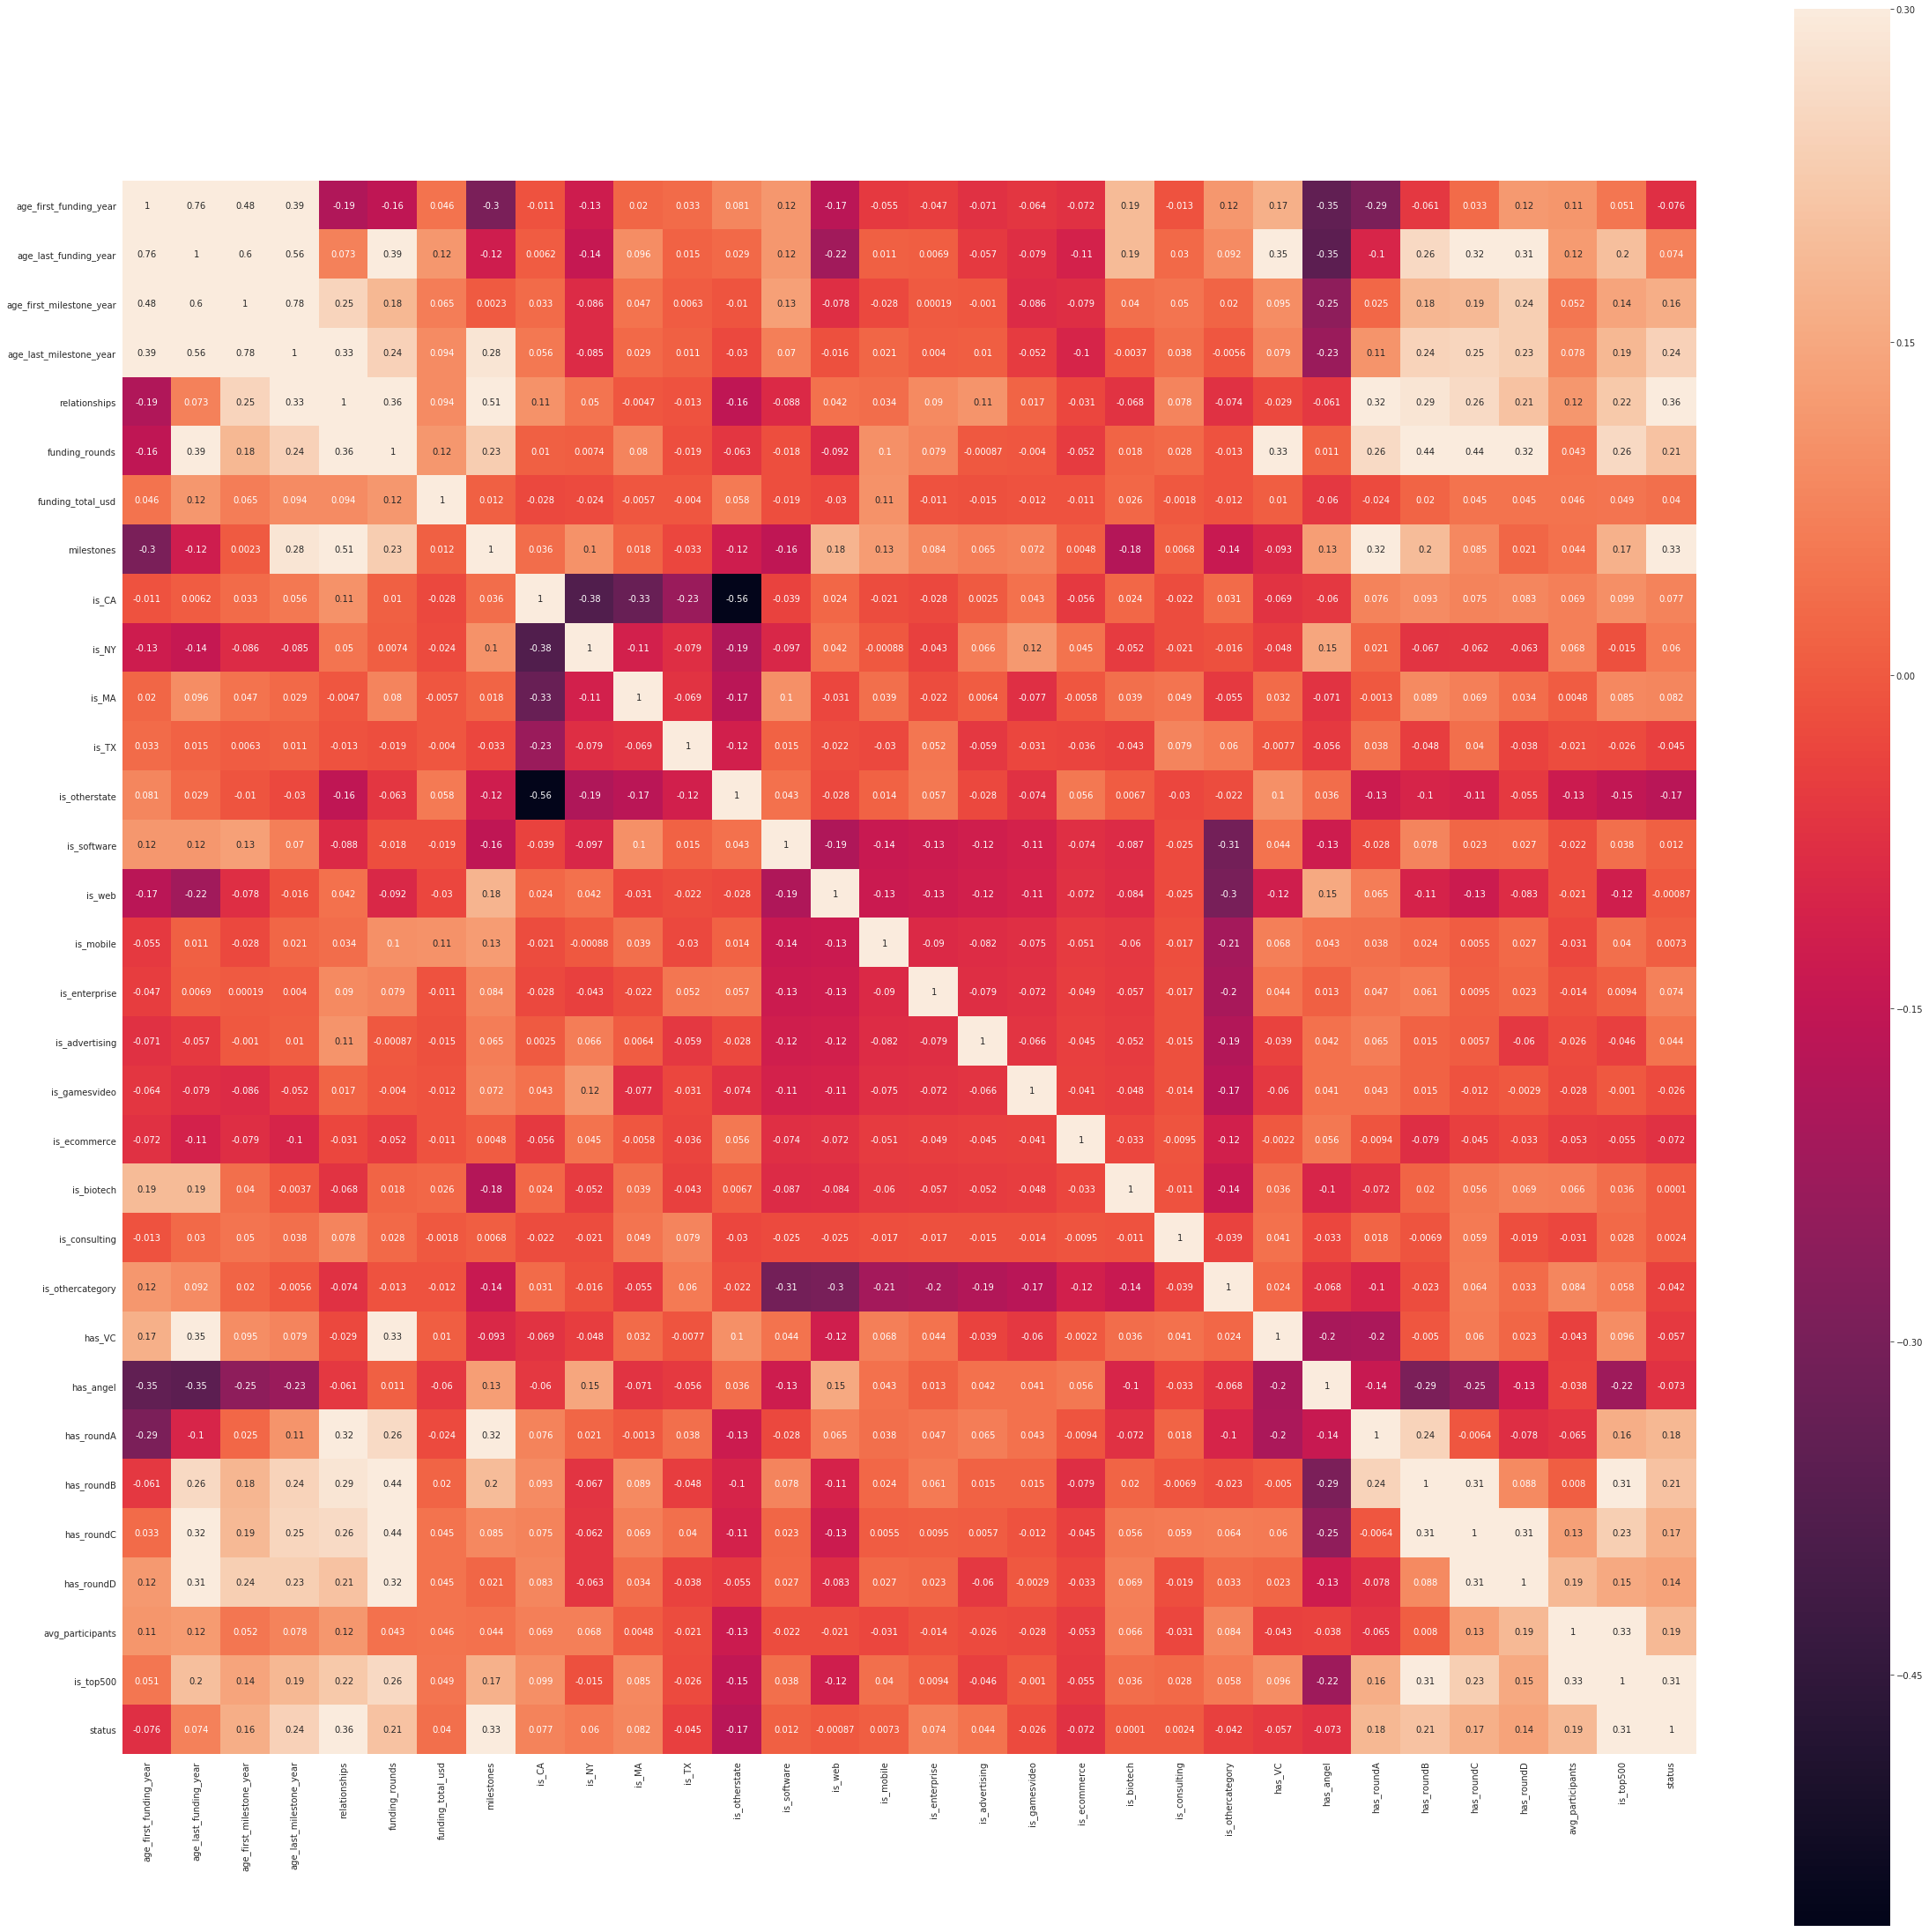

In [19]:
corr =train.corr()
mask = np.zeros_like(corr)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 40))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

In [20]:
# Split the data
# Input/independent variables
X = train.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = train['status'] # Output/Dependent variable
x_test = test

In [21]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  sc.fit_transform(X)
X

array([[ 0.00544819, -0.31310227,  0.62399033, ..., -0.3327311 ,
        -0.98131975, -2.06017431],
       [ 1.15196028,  2.04491818,  1.48117495, ...,  3.00542987,
         1.02019053,  0.48539582],
       [-0.47934943, -0.97716151, -0.55376739, ..., -0.3327311 ,
         0.61988848,  0.48539582],
       ...,
       [ 2.4950378 ,  1.53876602,  2.21475186, ...,  3.00542987,
         2.75483278,  0.48539582],
       [-0.58855244, -0.37034527, -0.81000581, ..., -0.3327311 ,
        -0.98131975,  0.48539582],
       [ 0.35266595, -0.27338952,  0.37978258, ..., -0.3327311 ,
         0.0861524 ,  0.48539582]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the test data :", x_test.shape)

Shape of the X Train : (738, 31)
Shape of the y Train : (738,)
Shape of the X test : (185, 31)
Shape of the y test : (185,)
Shape of the test data : (231, 31)


In [24]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

Training Accuracy : 0.8848238482384824
Testing Accuracy : 0.8864864864864865


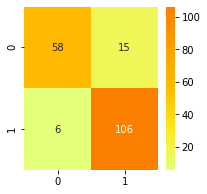

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        73
           1       0.88      0.95      0.91       112

    accuracy                           0.89       185
   macro avg       0.89      0.87      0.88       185
weighted avg       0.89      0.89      0.88       185

roc_auc 0.8704745596868885


In [25]:
# SVC
from sklearn.svm import SVC
sv = SVC(C=3,degree=5)

sv.fit(X,y)


y_pred_sv = sv.predict(X_test)

print("Training Accuracy :", sv.score(X_train, y_train))
print("Testing Accuracy :", sv.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_sv)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_sv)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_sv)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

Training Accuracy : 0.7831978319783198
Testing Accuracy : 0.7891891891891892


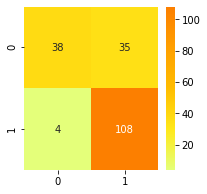

              precision    recall  f1-score   support

           0       0.90      0.52      0.66        73
           1       0.76      0.96      0.85       112

    accuracy                           0.79       185
   macro avg       0.83      0.74      0.75       185
weighted avg       0.81      0.79      0.77       185

roc_auc 0.742416829745597


In [26]:
# Random FOrest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=100, min_samples_split=20,
                       n_estimators=100,criterion='entropy',n_jobs=1000,max_leaf_nodes=100,max_features='auto'
                           )

    
rf.fit(X,y)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

Training Accuracy : 0.9471544715447154
Testing Accuracy : 0.9567567567567568


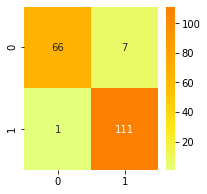

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        73
           1       0.94      0.99      0.97       112

    accuracy                           0.96       185
   macro avg       0.96      0.95      0.95       185
weighted avg       0.96      0.96      0.96       185

roc_auc 0.9475905088062623


In [27]:
# LGBM CLassifier
from lightgbm import LGBMClassifier
clf = LGBMClassifier(learning_rate=0.02,
                    boosting_type='gbdt', max_depth=4,  objective='binary', 
                    random_state=100,  
                  n_estimators=1000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)



clf.fit(X,y)

y_pred_lgb = clf.predict(X_test)


print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)